In [1]:
import pandas as pd
# 데이터 처리
import pandas as pd

# StringIO (CSV를 문자열로 처리)
from io import StringIO

# DB (SQLite)
import sqlite3

In [2]:
# =========================
# 1) import
# =========================
import pandas as pd
from io import StringIO
from sqlalchemy import create_engine, text

In [4]:
dept_t='''dept_code,dept_name
D01,영업
D02,개발
D03,마케팅
D04,인사'''

In [5]:
emp_t='''emp_id,emp_name,dept_code,position,hire_year
E001,김철수,D01,사원,2022
E002,이영희,D01,대리,2021
E003,박민수,D02,과장,2019
E004,최지은,D02,차장,2018
E005,정우성,D03,대리,2020
E006,한지민,D03,사원,2023
E007,오세훈,D04,과장,2017'''

In [6]:
payroll_t='''pay_id,emp_id,salary_month,salary_type,salary_amount
P001,E001,202401,M,2800000
P002,E002,202401,M,3300000
P003,E003,202401,M,4200000
P004,E004,202401,M,5200000
P005,E005,202401,M,3100000
P006,E006,202401,M,2600000
P007,E007,202401,M,4000000
P008,E001,202401,B,300000
P009,E002,202401,B,500000
P010,E003,202401,B,800000
P011,E004,202401,B,1200000
P012,E005,202401,B,400000'''

In [12]:

## mariadb 연결 정보
USER='root'
PASSWORD='1234'
HOST='localhost'
PORT=3306
DB='sin_ce2'    

engine=create_engine(
    f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}?charset=utf8mb4'
)



dept_df=pd.read_csv(StringIO(dept_t))

emp_df=pd.read_csv(StringIO(emp_t))

payroll_df=pd.read_csv(StringIO(payroll_t))

#테이블 적재
dept_df.to_sql('dept_t',con=engine, if_exists='replace',index=False)
emp_df.to_sql('emp_t',con=engine,if_exists='replace',index=False)
payroll_df.to_sql('payroll_t',con=engine,if_exists='replace',index=False)

print("mariaDB적재완료")

mariaDB적재완료


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [21]:
# 시각화 스타일 설정
import seaborn as sns  #-시각화
sns.set_style('whitegrid')              # 그리드 있는 깔끔한 스타일
plt.rc('font', family='Malgun Gothic')  # 한글 폰트(윈도우: 맑은 고딕)
plt.rc('axes', unicode_minus=False)     # 음수 표시 깨짐 방지
#/////////////////////////////////////////////////////
import matplotlib.pyplot as plt #  시각화 
import seaborn as sns   #자료 시각화}

C:\Users\SHIN\AppData\Local\Temp\ipykernel_7716\387967259.py:77: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_7716\387967259.py:77: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  plt.tight_layout()


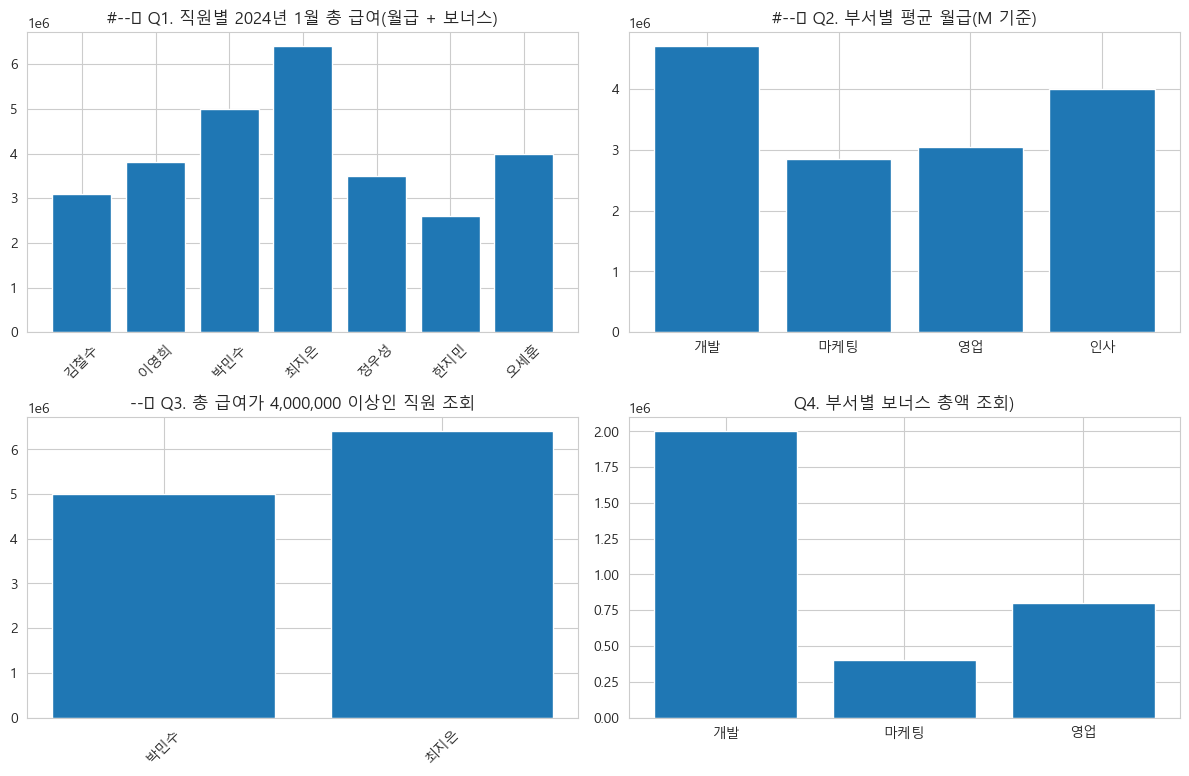

In [22]:
# db 연결정보
USER='root'
PASSWORD='1234'
HOST='localhost'
PORT=3306
DB='sin_ce2'    

engine=create_engine(
    f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}?charset=utf8mb4'
)
#--🟦 Q1. 직원별 2024년 1월 총 급여(월급 + 보너스)

q1='''SELECT e.emp_id,e.emp_name,SUM(p.salary_amount) AS sum_amount
FROM emp_t e JOIN payroll_t p
ON e.emp_id = p.emp_id
GROUP BY e.emp_id'''

#--🟦 Q2. 부서별 평균 월급(M 기준)

q2='''SELECT d.dept_name,AVG(p.salary_amount) AS avg_amount
FROM emp_t e JOIN payroll_t p
ON e.emp_id = p.emp_id
JOIN dept_t d
ON d.dept_code = e.dept_code
WHERE p.salary_type = 'M'
GROUP BY d.dept_name'''


#--👉 Q3. 총 급여가 4,000,000 이상인 직원 조회
q3='''SELECT e.emp_name,SUM(p.salary_amount) AS sum_salary
FROM emp_t e JOIN payroll_t p 
ON e.emp_id = p.emp_id
GROUP BY e.emp_name
HAVING SUM(p.salary_amount) > 4000000'''


#--👉 Q4. 부서별 보너스 총액 조회
q4='''SELECT d.dept_name ,SUM(p.salary_amount) AS sum_amount 
FROM dept_t d join emp_t e
ON d.dept_code=e.dept_code
JOIN payroll_t p 
ON p.emp_id = e.emp_id
WHERE p.salary_type = 'B'
GROUP BY d.dept_name'''

# sql-> dataframe화 
df_q1=pd.read_sql(q1,engine)
df_q2=pd.read_sql(q2,engine)
df_q3=pd.read_sql(q3,engine)
df_q4=pd.read_sql(q4,engine)

####시각화########

plt.figure(figsize=(12, 8))
## q1
plt.subplot(2,2,1)
plt.bar(df_q1['emp_name'],df_q1['sum_amount'])
plt.title("#--🟦 Q1. 직원별 2024년 1월 총 급여(월급 + 보너스)")
plt.xticks(rotation=45)

##q2
plt.subplot(2,2,2)
plt.bar(df_q2['dept_name'],df_q2['avg_amount'])
plt.title("#--🟦 Q2. 부서별 평균 월급(M 기준)")

##q3
plt.subplot(2,2,3)
plt.bar(df_q3['emp_name'],df_q3['sum_salary'])
plt.title('--👉 Q3. 총 급여가 4,000,000 이상인 직원 조회')
plt.xticks(rotation=45)

##q4
plt.subplot(2,2,4)
plt.bar(df_q4['dept_name'],df_q4['sum_amount'])
plt.title("Q4. 부서별 보너스 총액 조회)")

plt.tight_layout()
plt.show()
